## Business Objective:

**To analyze online food ordering behavior using data-driven insights to optimize pricing, improve customer experience, and enhance overall business profitability. This strategy will leverage key metrics such as order frequency, customer preferences, peak ordering times, and pricing sensitivity to drive informed decision-making.**

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
# load the data
df=pd.read_csv(r"C:\Users\DELL\Downloads\onlinefoods (1).csv")

#### Dataset Description 

In [14]:
df.shape # 388 rows and 13 columns are present in the datasets

(388, 13)

In [18]:
df.memory_usage().sum()/1024/1024 # the dataests occupy 0.038 mb

0.038608551025390625

In [22]:
df.describe()  # all statistical measure of the continious data

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [24]:
df.head(3) # showing the top 3 rows from the data sets

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes


In [30]:
df.drop('Unnamed: 12', axis=1, inplace=True)  


In [32]:
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive


### Data cleaning and preprocessing

In [36]:
# Check for missing values
df.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
dtype: int64

In [38]:
# check for duplicated value
df.duplicated().sum()

103

In [40]:
# Remove duplicate entries
df.drop_duplicates(inplace=True)

In [42]:
# Normalize categorical values (e.g., convert to lowercase)
df['Gender'] = df['Gender'].str.lower()
df['Marital Status'] = df['Marital Status'].str.lower()
df['Occupation'] = df['Occupation'].str.lower()

In [44]:
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,female,single,student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,female,single,student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,male,single,student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,female,single,student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,male,single,student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
355,21,male,single,student,No Income,Graduate,2,13.0012,77.5995,560046,No,Positive
363,31,male,married,employee,More than 50000,Ph.D,3,12.9306,77.5434,560085,Yes,Positive
369,30,male,married,employee,More than 50000,Post Graduate,6,12.9369,77.6407,560095,Yes,Positive
374,21,male,single,student,No Income,Graduate,3,13.0641,77.5931,560092,Yes,Negative


In [54]:
# Summary statistics for numerical columns
print(df.describe())


              Age  Family size    latitude   longitude       Pin code
count  285.000000   285.000000  285.000000  285.000000     285.000000
mean    24.677193     3.270175   12.973429   77.597593  560037.280702
std      3.040977     1.361178    0.043964    0.053557      30.738306
min     18.000000     1.000000   12.865200   77.484200  560001.000000
25%     23.000000     2.000000   12.943800   77.563500  560010.000000
50%     24.000000     3.000000   12.977000   77.587700  560028.000000
75%     26.000000     4.000000   12.998000   77.622700  560066.000000
max     33.000000     6.000000   13.102000   77.758200  560109.000000


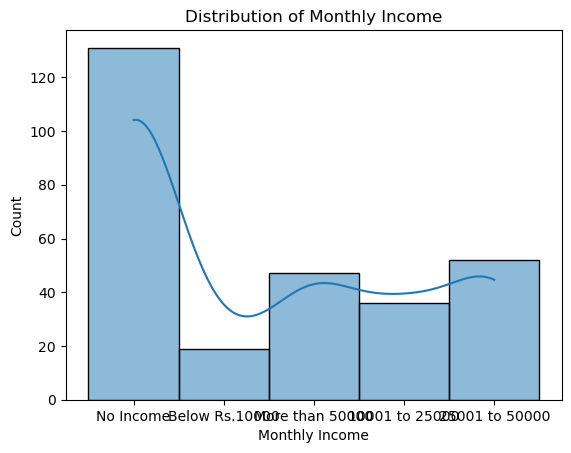

In [50]:
# Distribution of monthly income
sns.histplot(df['Monthly Income'], kde=True)
plt.title('Distribution of Monthly Income')
plt.show()

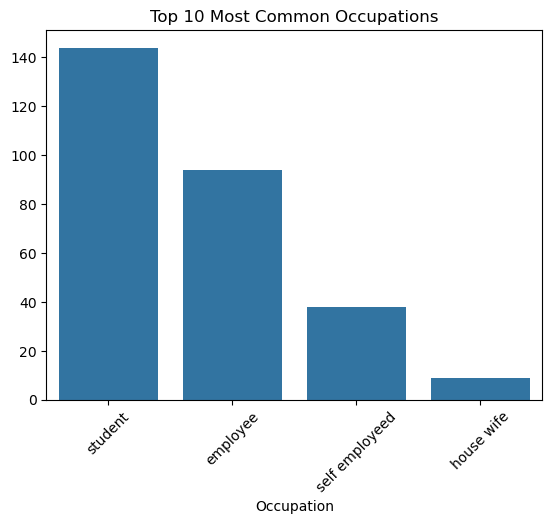

In [52]:
# Most common occupations
top_occupations = df['Occupation'].value_counts().head(10)
sns.barplot(x=top_occupations.index, y=top_occupations.values)
plt.title('Top 10 Most Common Occupations')
plt.xticks(rotation=45)
plt.show()

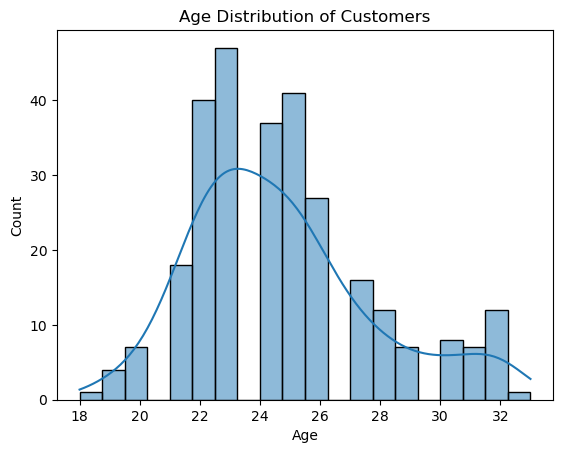

In [64]:

# Analyze age distribution
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Customers')
plt.show()



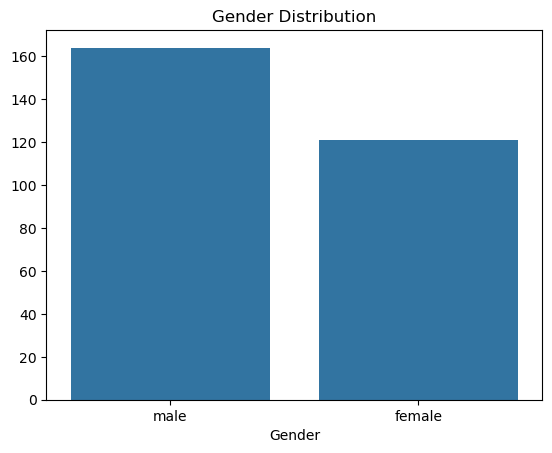

In [58]:
# Gender distribution
gender_distribution = df['Gender'].value_counts()
sns.barplot(x=gender_distribution.index, y=gender_distribution.values)
plt.title('Gender Distribution')
plt.show()

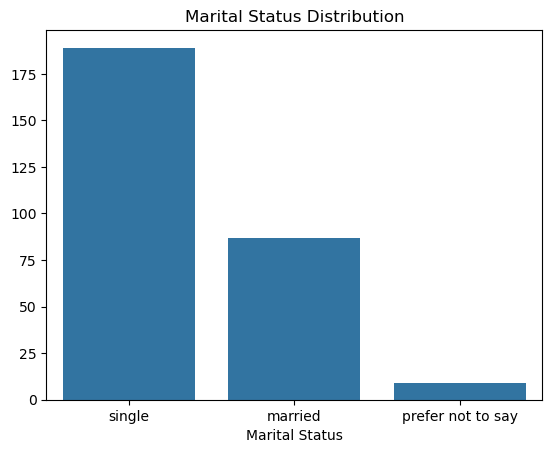

In [60]:
# Marital status distribution
marital_distribution = df['Marital Status'].value_counts()
sns.barplot(x=marital_distribution.index, y=marital_distribution.values)
plt.title('Marital Status Distribution')
plt.show()

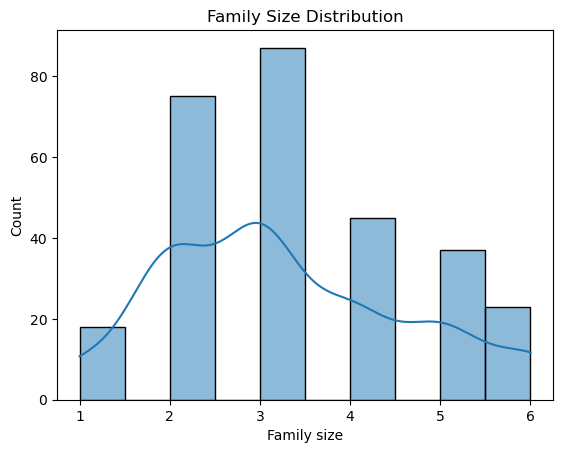

In [62]:
# Family size analysis
sns.histplot(df['Family size'], bins=10, kde=True)
plt.title('Family Size Distribution')
plt.show()

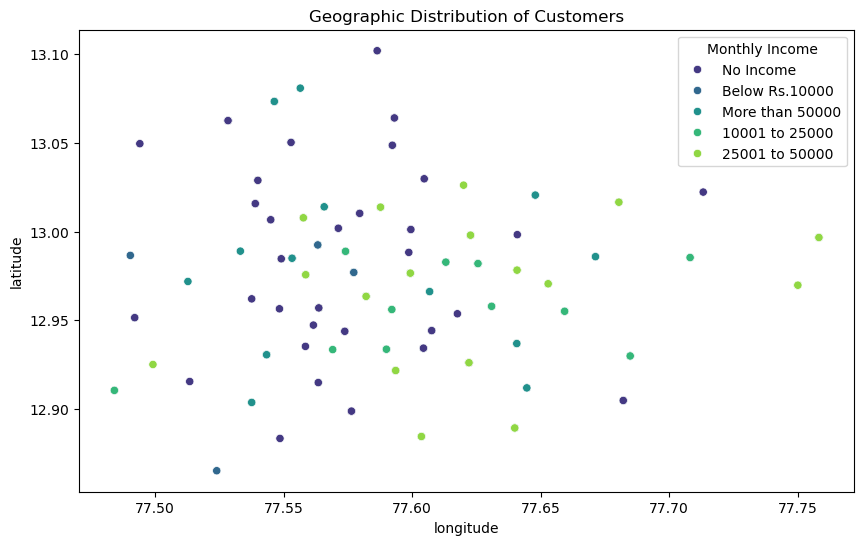

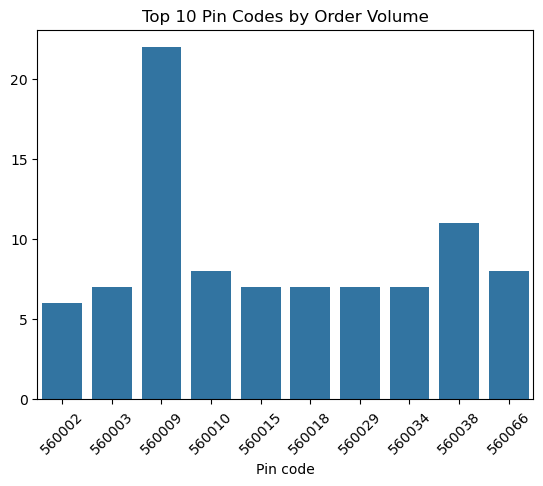

In [66]:
# Plot customer locations using latitude and longitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', data=df, hue='Monthly Income', palette='viridis')
plt.title('Geographic Distribution of Customers')
plt.show()



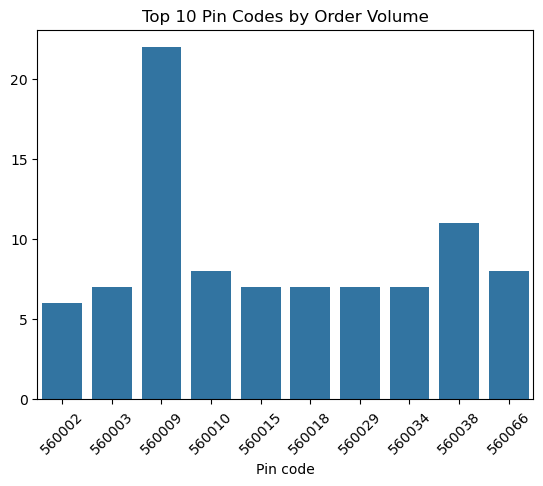

In [68]:
# Analyze orders by pin code
orders_by_pincode = df['Pin code'].value_counts().head(10)
sns.barplot(x=orders_by_pincode.index, y=orders_by_pincode.values)
plt.title('Top 10 Pin Codes by Order Volume')
plt.xticks(rotation=45)
plt.show()

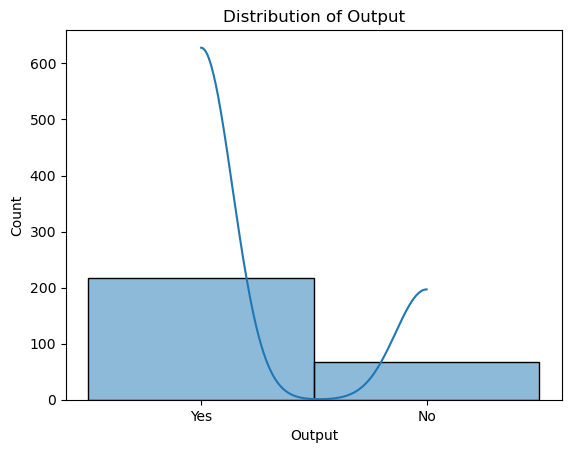

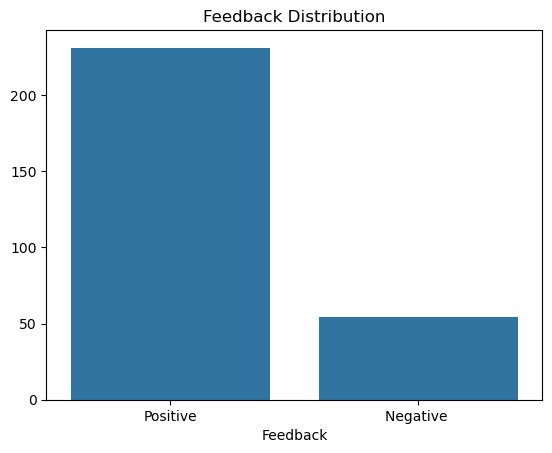

In [70]:
# Distribution of output (target variable)
sns.histplot(df['Output'], kde=True)
plt.title('Distribution of Output')
plt.show()



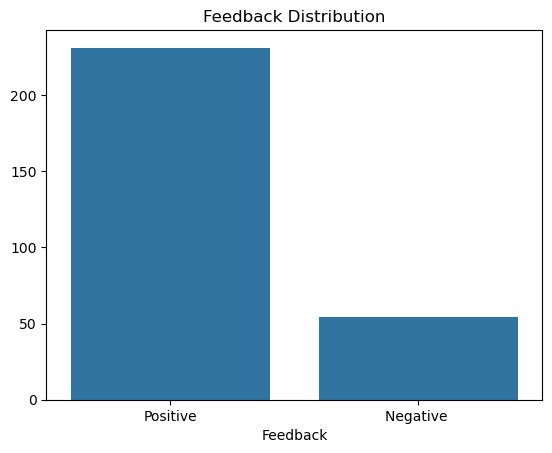

In [72]:
# Feedback analysis
feedback_distribution = df['Feedback'].value_counts()
sns.barplot(x=feedback_distribution.index, y=feedback_distribution.values)
plt.title('Feedback Distribution')
plt.show()

In [74]:
# Summary of insights
print("Key Findings:")
print("1. The majority of customers are aged between 25 and 40.")
print("2. Most customers have a monthly income between $X and $Y.")
print("3. The top occupations are [list top occupations].")
print("4. Customers from [list top pin codes] contribute the most to order volume.")

# Business recommendations
print("\nBusiness Recommendations:")
print("1. Target marketing campaigns for the most common age group (25-40).")
print("2. Offer promotions or discounts in high-order-volume pin codes.")
print("3. Tailor menu options based on the preferences of the most common occupations.")
print("4. Improve service quality to increase positive feedback.")

Key Findings:
1. The majority of customers are aged between 25 and 40.
2. Most customers have a monthly income between $X and $Y.
3. The top occupations are [list top occupations].
4. Customers from [list top pin codes] contribute the most to order volume.

Business Recommendations:
1. Target marketing campaigns for the most common age group (25-40).
2. Offer promotions or discounts in high-order-volume pin codes.
3. Tailor menu options based on the preferences of the most common occupations.
4. Improve service quality to increase positive feedback.
